In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#import the requests library
import requests

#import the API key
from config import weather_api_key

#import the datetime module from the datetime library
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
!pip install citipy

In [9]:
from citipy import citipy

In [10]:
def latitudes(sample):
    latitudes= list(np.random.uniform(-90.000, 90.000, size= sample))

    return latitudes

def longitudes (sample):
    longitudes= list(np.random.uniform(-180.000, 180.000, size= sample))
    
    return longitudes

In [15]:
coordinates= zip(latitudes(1100),longitudes(1100))

cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

508

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | maniitsoq
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | aswan
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | kharian
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | sorland
Processing Record 14 of Set 1 | husavik
Processing Record 15 of Set 1 | saint-prosper
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | calbuco
Processing Record 18 of Set 1 | srednekolymsk
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | pouebo
Processing Record 23 of Set 1 | tautira
Proce

Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | sisimiut
Processing Record 41 of Set 4 | korla
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | mayor pablo lagerenza
Processing Record 44 of Set 4 | magadan
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | baracoa
Processing Record 47 of Set 4 | soyo
Processing Record 48 of Set 4 | fukue
Processing Record 49 of Set 4 | kampong chhnang
Processing Record 50 of Set 4 | loma de gato
Processing Record 1 of Set 5 | flin flon
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | codrington
Processing Record 4 of Set 5 | srandakan
Processing Record 5 of Set 5 | muros
Processing Record 6 of Set 5 | sangar
Processing Record 7 of Set 5 | mangotsfield
Processing Record 8 of Set 5 | zhigansk
Processing Record 9 of Set 5 | bay roberts
Processing Record 10 of Set 5 | toamasina
Processing Record 11 of Set 5 | saint-joseph
Processing Record 12 of Set 5 

Processing Record 32 of Set 8 | phanat nikhom
Processing Record 33 of Set 8 | usinsk
Processing Record 34 of Set 8 | carnduff
Processing Record 35 of Set 8 | tigil
Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 38 of Set 8 | lahaina
Processing Record 39 of Set 8 | avarua
Processing Record 40 of Set 8 | riesa
Processing Record 41 of Set 8 | emerald
Processing Record 42 of Set 8 | auki
Processing Record 43 of Set 8 | uyskoye
Processing Record 44 of Set 8 | orje
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | naze
Processing Record 47 of Set 8 | centralina
Processing Record 48 of Set 8 | poum
Processing Record 49 of Set 8 | cheltenham
Processing Record 50 of Set 8 | sturgis
Processing Record 1 of Set 9 | karpogory
Processing Record 2 of Set 9 | kazalinsk
City not found. Skipping...
Processing Record 3 of Set 9 | tumannyy
City not found. Skipping...
Processing Record 4 of 

In [19]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,37.40,83,0,8.05,AU,2020-06-17 16:49:52
1,Maniitsoq,65.42,-52.90,35.19,87,91,2.68,GL,2020-06-17 16:50:46
2,Kapaa,22.08,-159.32,75.20,78,20,12.75,US,2020-06-17 16:50:46
3,Geraldton,-28.77,114.60,66.20,63,90,21.92,AU,2020-06-17 16:50:46
4,New Norfolk,-42.78,147.06,35.01,90,0,2.59,AU,2020-06-17 16:48:30
5,Aswan,24.09,32.91,96.91,9,0,7.78,EG,2020-06-17 16:50:46
6,Ushuaia,-54.80,-68.30,39.20,69,40,3.36,AR,2020-06-17 16:46:19
7,Hithadhoo,-0.60,73.08,84.69,73,41,6.73,MV,2020-06-17 16:49:58
8,Kharian,32.81,73.86,93.20,41,40,4.70,PK,2020-06-17 16:50:47
9,Faanui,-16.48,-151.75,80.26,80,100,10.02,PF,2020-06-17 16:50:47


In [20]:
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today


'06/17/20'

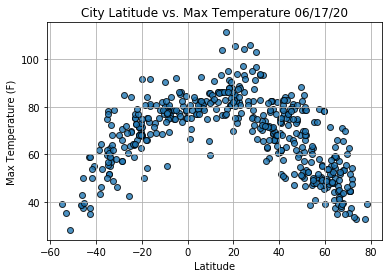

In [31]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

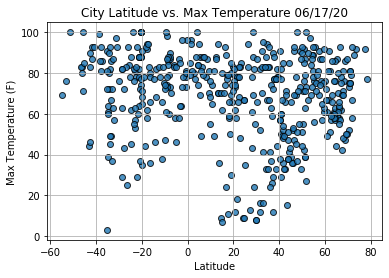

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

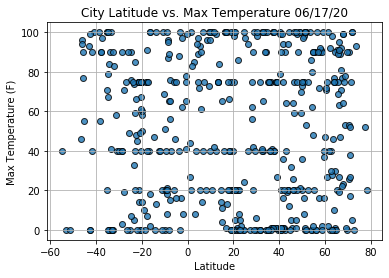

In [29]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

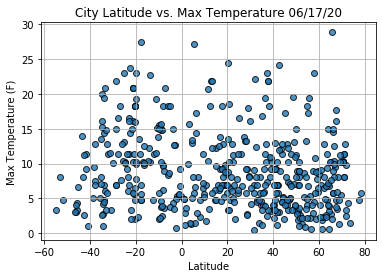

In [32]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()